**Getting to know TensorFlow**

In [ ]:
import tensorflow as tf

hello = tf.constant("Hello Tensorflow!")
print(hello)

tf.Tensor(b'Hello Tensorflow!', shape=(), dtype=string)


**Understanding computational graphs and sessions**

In [ ]:
x = 2
y = 3
z = tf.add(x,y,name="Add")
print(z)

tf.Tensor(5, shape=(), dtype=int32)


**Direct Dependency**<br>
Say we have the **b** node, the input of which is
dependent on the output of the a node; this type of dependency is called
direct dependency.

In [ ]:
a = tf.multiply(8,5)
b = tf.multiply(a,1)
print(b)

tf.Tensor(40, shape=(), dtype=int32)


**Indirect Dependency** <br>
When the **b** node doesn't depend on the a node for its input, it is called
indirect dependency, as shown in the following code.

In [ ]:
a = tf.multiply(8,5)
b = tf.multiply(4,3)
print(b)

tf.Tensor(12, shape=(), dtype=int32)


A TensorFlow graph can be created using ***tf.Graph()*** ,
as follows:

In [ ]:
graph = tf.Graph()

with graph.as_default():
  z = tf.add(x, y, name='Add')

In [ ]:
tf.compat.v1.disable_eager_execution()
a = tf.multiply(3,3)
print(a)

Tensor("Mul:0", shape=(), dtype=int32)


In order to print 9, we need to initialize and run the Tensorflow session

In [ ]:
a = tf.multiply(3,3)
with tf.compat.v1.Session() as sess:
  print(sess.run(a))

9


**Variables, constants, and placeholders**

1. **Variables** : Variables are containers used to store values. Variables are used as input to
several other operations in a computational graph.

In [ ]:
x =tf.Variable(13)

In [ ]:
W = tf.Variable(tf.random.normal([500, 111], stddev=0.35), name="weights")
#parameter "name" is used to set the name of the variable in the computational graph. Python saves the variable as w but in Tensorflow graph, it will be saved as weights
print(W)

<tf.Variable 'weights:0' shape=(500, 111) dtype=float32>


We can also initialize a new variable with a value from another variable
using initialized_value().

In [ ]:
W2 = tf.Variable(W.initialized_value(), name="weights_2")

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


In [ ]:
z = tf.Variable(1212)
init = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as sess:
    sess.run(init)
    print(sess.run(z))

1212


We can also create a TensorFlow variable using tf.get_variable() <br>
Variables created using tf.Variable() cannot be shared, and every time we call
tf.Variable(), it will create a new variable. But tf.get_variable() checks the
computational graph for an existing variable with the specified parameter. If
the variable already exists, then it will be reused; otherwise, a new variable
will be created.

In [ ]:
W3 = tf.compat.v1.get_variable(name = 'weights', shape = [500, 111], initializer = tf.random_normal_initializer())
print(W3)

<tf.Variable 'weights_1:0' shape=(500, 111) dtype=float32>


In [ ]:
with tf.compat.v1.variable_scope("scope"):
    a = tf.compat.v1.get_variable('x', [2])
with tf.compat.v1.variable_scope("scope", reuse = True):
    b = tf.compat.v1.get_variable('x', [2])

Printing a.name and b.name, then it will return the same name,since reuse=True parameter is specified in the variable
scope named scope, which implies that the variables can be shared. If we
don't set reuse = True, then it will give an error saying that the variable already exists.

In [ ]:
print(a.name)
print(b.name)

scope/x:0
scope/x:0


Constants

In [ ]:
x = tf.constant(13)
x

<tf.Tensor 'Const:0' shape=() dtype=int32>

Placeholders and feed dictionaries <br>
 We can think of placeholders as variables, where we only define the type and
dimension, but do not assign the value. Values for the placeholders will be
fed at runtime. We feed the data to the computational graphs using
placeholders. Placeholders are defined with no values.

In [ ]:
x = tf.compat.v1.placeholder("float", shape=None)
print(x)

Tensor("Placeholder:0", dtype=float32)


In [ ]:
x = tf.compat.v1.placeholder("float", None)
y = x +3
with tf.compat.v1.Session() as sess:
    result = sess.run(y)
    print(result)

InvalidArgumentError: ignored

As we can see, the code above results in error beacuse we are trying to compute y where y = x+3 and x is a placeholder whose value is not assgined.

To solve this we can use **feed dictionary**.
The feed_dict parameter is basically the dictionary where the key
represents the name of the placeholder, and the value represents the value of
the placeholder.

In [ ]:
with tf.compat.v1.Session() as sess:
    result = sess.run(y, feed_dict={x: 5})
    print(result)

8.0


In [ ]:
with tf.compat.v1.Session() as sess:
  result = sess.run(y, feed_dict={x: [3,6,9]})
  print(result)

[ 6.  9. 12.]


Tensorboard <br>
Building a basic computational graph and visualizing it in TensorBoard.

In [ ]:
x = tf.constant(1,name='x')
y = tf.constant(1,name='y')
a = tf.constant(3,name='a')
b = tf.constant(3,name='b')

In [ ]:
prod1 = tf.multiply(x,y,name='prod1')
prod2 = tf.multiply(a,b,name='prod2')

In [ ]:
sum = tf.add(prod1,prod2,name='sum')

In [ ]:
with tf.compat.v1.Session() as sess:
    writer = tf.compat.v1.summary.FileWriter(logdir='./graphs',graph=sess.graph)
    print(sess.run(sum))

10


Creating a name scope


In [28]:
with tf.name_scope("Product"):
    with tf.name_scope("prod1"):
        prod1 = tf.multiply(x,y,name='prod1')
    with tf.name_scope("prod2"):
        prod2 = tf.multiply(a,b,name='prod2')

In [29]:
with tf.name_scope("sum"):
    sum = tf.add(prod1,prod2,name='sum')

In [30]:
with tf.compat.v1.Session() as sess:
    writer = tf.compat.v1.summary.FileWriter('./graphs', sess.graph)
    print(sess.run(sum))

10


# Handwritten digit classification using Tensorflow

In [31]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#Load the dataset
mnist = tf.keras.datasets.mnist

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [34]:
print("No of images in training set {}".format(x_train.shape))
print("No of labels in training set {}".format(y_train.shape))
print("No of images in test set {}".format(x_test.shape))
print("No of labels in test set {}".format(y_test.shape))

No of images in training set (60000, 28, 28)
No of labels in training set (60000,)
No of images in test set (10000, 28, 28)
No of labels in test set (10000,)


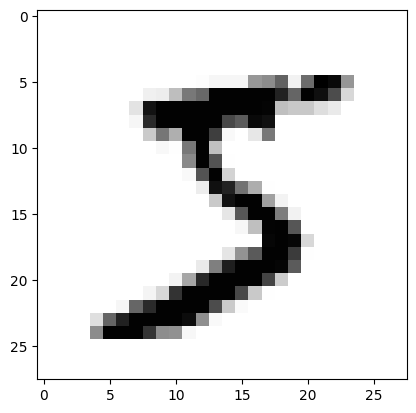

In [35]:
img1 = x_train[0].reshape(28,28)
plt.imshow(img1, cmap='Greys')

In [36]:
#number of neurons in input layer
num_input = 784
#num of neurons in hidden layer 1
num_hidden1 = 512
#num of neurons in hidden layer 2
num_hidden2 = 256
#num of neurons in hidden layer 3
num_hidden_3 = 128
#num of neurons in output layer
num_output = 10

In [37]:
# Defining placeholder
with tf.name_scope('input'):
    X = tf.compat.v1.placeholder("float", [None, num_input])
with tf.name_scope('output'):
    Y = tf.compat.v1.placeholder("float", [None, num_output])

In [38]:
#Defining weights
with tf.name_scope('weights'):
    weights = {
    'w1': tf.Variable(tf.compat.v1.truncated_normal([num_input, num_hidden1], stddev=0.1),name='weight_1'),
    'w2': tf.Variable(tf.compat.v1.truncated_normal([num_hidden1, num_hidden2], stddev=0.1),name='weight_2'),
    'w3': tf.Variable(tf.compat.v1.truncated_normal([num_hidden2, num_hidden_3], stddev=0.1),name='weight_3'),
    'out': tf.Variable(tf.compat.v1.truncated_normal([num_hidden_3, num_output], stddev=0.1),name='weight_4'),
    }

In [39]:
#Defining biases
with tf.name_scope('biases'):
    biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]),name='bias_1'),
    'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]),name='bias_2'),
    'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden_3]),name='bias_3'),
    'out': tf.Variable(tf.constant(0.1, shape=[num_output]),name='bias_4')
    }

In [40]:
#Forward Propogation
with tf.name_scope('Model'):
    with tf.name_scope('layer1'):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['w1']), biases['b1']) )
    with tf.name_scope('layer2'):
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']), biases['b2']))
    with tf.name_scope('layer3'):
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']))
    with tf.name_scope('output_layer'):
        y_hat = tf.nn.sigmoid(tf.matmul(layer_3, weights['out']) + biases['out'])

In [41]:
#Computing Loss and backpropagation
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat,labels=Y))

In [42]:
learning_rate = 1e-4
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate).minimize(loss)

In [43]:
#Computing Accuracy
with tf.name_scope('Accuracy'):
    predicted_digit = tf.argmax(y_hat, 1)
    actual_digit = tf.argmax(Y, 1)
    correct_pred = tf.equal(predicted_digit,actual_digit)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [44]:
tf.compat.v1.summary.scalar("Accuracy", accuracy)
tf.compat.v1.summary.scalar("Loss", loss)
merge_summary = tf.compat.v1.summary.merge_all()

In [45]:
#Training the model
init = tf.compat.v1.global_variables_initializer()
num_iterations = 1000
batch_size = 128

In [50]:
import numpy as np
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels.
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

def to_categorical(data):
    categorical_data = []
    for each in data:
        categorical = []
        for i in range(0, 10):
            if each == i:
                categorical.append(1)
            else:
                categorical.append(0)
        categorical_data.append(categorical)
    return categorical_data


with tf.compat.v1.Session() as sess:
    sess.run(init)
    summary_writer = tf.compat.v1.summary.FileWriter('./graphs', graph=sess.graph)
    for i in range(num_iterations):
        batch_x, batch_y = next_batch(batch_size, x_train, y_train)
        batch_x = np.resize(batch_x, (batch_size, 784))
        batch_y = to_categorical(batch_y)
        sess.run(optimizer, feed_dict={ X: batch_x, Y: batch_y})
        if i % 100 == 0:
            batch_loss, batch_accuracy,summary = sess.run([loss, accuracy, merge_summary], feed_dict={X: batch_x, Y: batch_y})
            #store all the summaries
            summary_writer.add_summary(summary, i)
            print('Iteration: {}, Loss: {}, Accuracy:{}'.format(i,batch_loss,batch_accuracy))

Iteration: 0, Loss: 2.377816677093506, Accuracy:0.0703125
Iteration: 100, Loss: 2.0083718299865723, Accuracy:0.1328125
Iteration: 200, Loss: 1.8099548816680908, Accuracy:0.5078125
Iteration: 300, Loss: 1.6913025379180908, Accuracy:0.703125
Iteration: 400, Loss: 1.7272582054138184, Accuracy:0.65625
Iteration: 500, Loss: 1.6961936950683594, Accuracy:0.734375
Iteration: 600, Loss: 1.6595377922058105, Accuracy:0.7265625
Iteration: 700, Loss: 1.6456265449523926, Accuracy:0.7421875
Iteration: 800, Loss: 1.6729934215545654, Accuracy:0.78125
Iteration: 900, Loss: 1.6046950817108154, Accuracy:0.7421875


In [ ]:
%load_ext tensorboard
%tensorboard --logdir=graphs --port=8001